# Step 1 Import Required Libraries

In [8]:
# Import essential libraries for data handling, clustering, and visualization
import pandas as pd                # For reading and manipulating dataset
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For plotting graphs
import seaborn as sns              # For better visualizations

# Import KMeans from sklearn for clustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


# Step 2 Load and Inspect Dataset

In [9]:
# Load the sales dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Display first 5 rows
print("First 5 rows of dataset:\n")
print(df.head())

# Show basic info
print("\nDataset Information:\n")
print(df.info())


First 5 rows of dataset:

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

### Explanation:

### Reads dataset from the uploaded file.

### encoding='latin1' fixes common encoding issues in sales datasets.

### df.head() displays first few rows to verify data loaded correctly.

### df.info() shows column names, data types, and non-null counts.

# Step 3 Data Preprocessing

In [10]:
# Check for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Select numerical columns for clustering (K-Means works with numbers only)
numeric_df = df.select_dtypes(include=[np.number])

# Display selected numerical columns
print("\nNumeric columns used for clustering:\n", numeric_df.columns.tolist())

# Drop rows with missing numeric values (if any)
numeric_df = numeric_df.dropna()



Missing values in each column:

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Numeric columns used for clustering:
 ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']


### numeric_df = df.select_dtypes(include=[np.number]) 
### df.select_dtypes() filters columns by their data type.

### include=[np.number] means “select only numeric columns” (like int64 or float64).

### This is crucial because K-Means works only on numerical data — it cannot handle text (like “Product Line” or “Country”).

### So this line creates a new dataframe called numeric_df containing only numeric columns from your dataset.
## ---------------------------------------------------------------------------------------------------
### numeric_df = numeric_df.dropna()
### .dropna() removes rows that contain missing (NaN) values.Even if one numeric column has a missing value, that entire row is dropped.This is necessary because K-Means cannot work if there are missing values.

# Step 4 Feature Scaling (Optional but Recommended)

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the data so that all features contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

print("\nScaled data shape:", scaled_data.shape)



Scaled data shape: (2823, 9)


# Step 5 Determine Optimal Number of Clusters (Elbow Method)

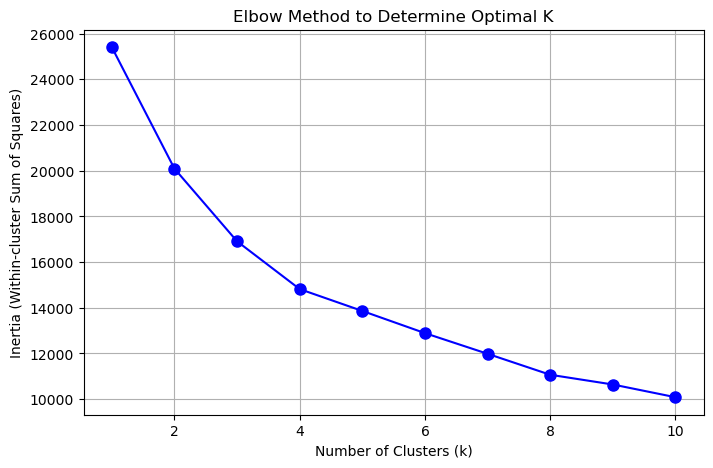

In [12]:
# Find the optimal number of clusters using the Elbow Method
inertia_values = []  # to store sum of squared distances for each k
K = range(1, 11)     # test for 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia_values, 'bo-', markersize=8)
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()


### for k in K:
###        kmeans = KMeans(n_clusters=k, random_state=42)
###        kmeans.fit(scaled_data)
###        inertia_values.append(kmeans.inertia_)
### 🧩 for k in K: We start looping over each possible value of k (from 1 to 10). For every iteration, we create and train a new K-Means model using that number of clusters.
# ----------------------------------------------------------------
### 🧩 kmeans = KMeans(n_clusters=k, random_state=42) 
### This creates a K-Means model where:

### n_clusters=k → number of clusters to divide data into (e.g., 2, 3, 4…)

### random_state=42 → keeps results consistent every time you run it (for reproducibility).

### So if k = 3, it will create a model that tries to divide data into 3 groups (clusters).
# -----------------------------------------------------------------
### 🧩 kmeans.fit(scaled_data)

### The .fit() method applies the K-Means algorithm on your dataset.

### What happens inside:

### The algorithm randomly picks k data points as initial cluster centers (centroids).

### It assigns each data point to the nearest centroid (using distance formula — Euclidean distance).

### Then it recalculates the centroid of each cluster (mean of points inside it).

### Steps 2 and 3 are repeated until centroids stop changing (convergence).

### This process groups your data into k clusters.
# ------------------------------------------------------------------------
### 🧩 inertia_values.append(kmeans.inertia_)

### After fitting, each KMeans model calculates a number called “inertia”.
### Inertia = sum of squared distances between each data point and its nearest cluster center.
### Intuition:

### Low inertia → points are close to their cluster center → compact clusters.

### High inertia → points are far apart → poor clustering.

### We store this inertia value for the current k (1, 2, 3, etc.) into the list.
# -----------------------------------------------------------------------
### plt.figure(figsize=(8,5)) : Creates a new figure window with width 8 and height 5 (for good readability).
### plt.plot(K, inertia_values, 'bo-', markersize=8) :

### Plots the inertia (y-axis) vs number of clusters (x-axis).

### 'bo-' means:

### b → blue color

### o → circle markers

### - → connect them with a line

### markersize=8 makes points more visible.

### So this line draws a smooth curve showing how inertia changes as k increases.

# Step 6 Apply K-Means with Optimal K

In [15]:
# Suppose elbow curve shows the elbow at k = 3 (you can change based on your result)
optimal_k = 4

# Create and fit KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
numeric_df['Cluster'] = labels

# Show few records with assigned cluster
print("\nClustered Data (first 10 rows):\n")
print(numeric_df.head(10))



Clustered Data (first 10 rows):

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   
5        10168               36      96.66                1  3479.76       4   
6        10180               29      86.13                9  2497.77       4   
7        10188               48     100.00                1  5512.32       4   
8        10201               22      98.57                2  2168.54       4   
9        10211               41     100.00               14  4708.44       1   

   MONTH_ID  YEAR_ID  MSRP  Cluster  
0         2     2003    95        2  
1        

### optimal_k = 3
### 🧠 Explanation:

### From the Elbow Method plot (in Cell 5), you observe a “bend” or “elbow” at a certain number of clusters.

### That number represents the point beyond which adding more clusters doesn’t improve much.

### We store that in optimal_k.

### Here, we assume it’s 3 — but you’ll change it if your elbow is at 4, 5, etc.
# ------------------------------------------------------------------------------
###  Create and fit KMeans model
### kmeans = KMeans(n_clusters=optimal_k, random_state=42)
### kmeans.fit(scaled_data)
### 🧠 Explanation:

### We create a KMeans model object from sklearn.cluster.

### n_clusters=optimal_k → tells it how many clusters to create.

### random_state=42 → makes the result the same every time you run it (for consistency).

### Then we call kmeans.fit(scaled_data):

### This starts the K-Means algorithm.

### It takes your scaled dataset (which contains numeric features like sales amounts, quantities, etc.).

### Internally, it:

### Randomly picks 3 points (because k=3) as cluster centroids.

### Assigns every record to the nearest centroid.

### Moves centroids to the new average position.

### Repeats until all points stay in the same cluster.

### After .fit(), the algorithm has “learned” which records belong to which cluster.
# ---------------------------------------------------------------------
### Get cluster labels
### labels = kmeans.labels_
### 🧠 Explanation:

### Once the model is trained, KMeans gives a label (number) for each record in your dataset.

### For example:

### Cluster 0 → customers who buy small quantities.

### Cluster 1 → medium buyers.

### Cluster 2 → large buyers.

### These labels are stored in the variable labels, which is a list of integers.

### Example: [0, 1, 2, 1, 0, 2, ...] = It means the first record belongs to cluster 0, second to cluster 1, etc.
# ------------------------------------------------------------------------
###  Add cluster labels to the original DataFrame
### numeric_df['Cluster'] = labels
### 🧠 Explanation:

### We add a new column named "Cluster" to our dataset.

### Each record now shows which cluster it belongs to.

# Step 7 Visualize Clusters (Optional 2D View)

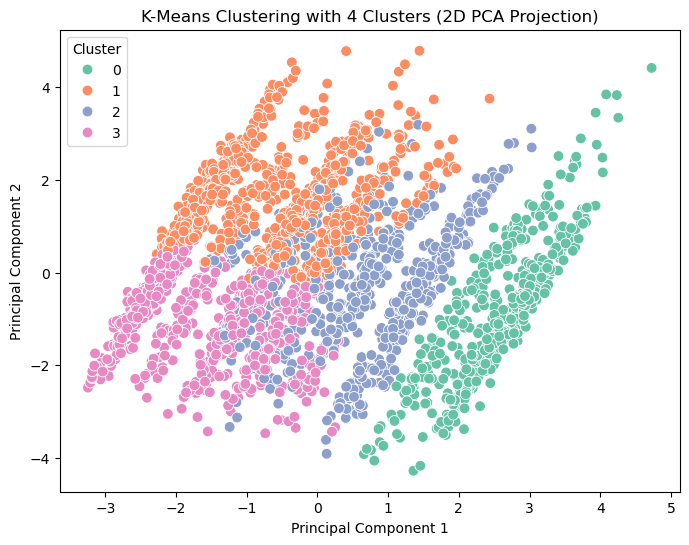

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for easy visualization
pca = PCA(2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1],
                hue=labels, palette='Set2', s=60)
plt.title(f"K-Means Clustering with {optimal_k} Clusters (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


# Step 8 Analyze Cluster Characteristics

In [17]:
# Calculate average values of each feature per cluster
cluster_summary = numeric_df.groupby("Cluster").mean()

print("\nCluster Summary (mean of each feature):\n")
print(cluster_summary)



Cluster Summary (mean of each feature):

          ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
Cluster                                                              
0        10392.297071        36.884937  83.445251         5.972803   
1        10251.917722        35.882911  98.114736         6.526371   
2        10181.122172        34.880845  85.962443         6.419306   
3        10250.628065        33.096730  63.045463         6.752044   

               SALES    QTR_ID  MONTH_ID      YEAR_ID        MSRP  
Cluster                                                            
0        3747.880146  1.368201  3.002092  2005.000000  100.167364  
1        4667.745464  3.630802  9.835443  2003.566456  127.525316  
2        3468.713846  1.485671  3.368024  2003.565611  100.726998  
3        2065.888501  3.529973  9.577657  2003.589918   66.435967  


### Explanation:

### Groups data by cluster and calculates mean of each numeric feature.

### Helps to understand what makes each cluster different — e.g., cluster 0 may represent high sales orders, cluster 1 low sales, etc.